# Model Building

## Imports

In [29]:
import pandas as pd
import numpy as np
import pickle
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Set Options

In [30]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

random.seed(129)

## Load Data

In [15]:
df = pickle.load(open('./clean_data/total.pkl', 'rb'))

## Inspect Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5235 entries, 0 to 5234
Data columns (total 46 columns):
Player                     5235 non-null object
Club                       5235 non-null object
POS                        5235 non-null object
GP                         5235 non-null int64
GS                         5235 non-null int64
MINS                       5235 non-null int64
G                          5235 non-null int64
A                          5235 non-null int64
SHTS_FP                    5235 non-null int64
SOG                        5235 non-null int64
GWG                        5235 non-null int64
HmG                        5235 non-null int64
RdG                        5235 non-null int64
Gp90                       5235 non-null float64
SCpct                      5235 non-null float64
Year                       5235 non-null int64
Season                     5235 non-null object
GWA                        5235 non-null int64
HmA                        5235 non-nul

In [17]:
pd.concat([df.head(10), df.tail(10)], axis=0)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,Year,Season,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,Last Name,First Name,Base Salary,Guaranteed Compensation,Date,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
0,Luciano Emilio,DC,F,29.0,28.0,2410.0,20.0,1.0,79.0,47.0,4.0,12.0,8.0,0.75,25.3,2007,REG,1.0,1.0,0.0,0.04,59.5,35.0,39.0,21.0,2.0,0.0,0.0,0.0,Emilio,Luciano,265000.00,293125.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Juan Pablo Angel,NY,F,24.0,24.0,2125.0,19.0,5.0,97.0,53.0,5.0,13.0,6.0,0.80,19.6,2007,REG,2.0,3.0,2.0,0.21,54.6,31.0,20.0,42.0,2.0,1.0,5.0,5.0,Pablo Angel,Juan,1500000.00,1593750.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Taylor Twellman,NE,F,26.0,25.0,2283.0,16.0,3.0,90.0,55.0,5.0,7.0,9.0,0.63,17.8,2007,REG,1.0,2.0,1.0,0.12,61.1,13.0,41.0,21.0,2.0,0.0,0.0,0.0,Twellman,Taylor,325008.00,350008.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Eddie Johnson,KC,F,24.0,24.0,2149.0,15.0,6.0,75.0,43.0,6.0,8.0,7.0,0.63,20.0,2007,REG,2.0,3.0,3.0,0.25,57.3,21.0,57.0,50.0,6.0,0.0,1.0,1.0,Johnson,Eddie,750000.00,875000.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Maykel Galindo,CHV,F,28.0,24.0,2021.0,12.0,5.0,55.0,28.0,5.0,8.0,4.0,0.53,21.8,2007,REG,3.0,3.0,2.0,0.22,50.9,44.0,53.0,30.0,6.0,0.0,0.0,0.0,Galindo,Maykel,72500.00,72500.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Ante Razov,CHV,F,26.0,24.0,2041.0,11.0,8.0,85.0,42.0,4.0,9.0,2.0,0.49,12.9,2007,REG,4.0,5.0,3.0,0.35,49.4,37.0,33.0,30.0,2.0,0.0,1.0,1.0,Razov,Ante,245000.00,248750.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Landon Donovan,LA,M-F,25.0,24.0,2191.0,8.0,13.0,44.0,20.0,1.0,5.0,3.0,0.33,18.2,2007,REG,3.0,10.0,3.0,0.53,45.5,19.0,40.0,11.0,3.0,0.0,5.0,6.0,Donovan,Landon,900000.00,900000.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ben Olsen,DC,M,24.0,21.0,1881.0,7.0,7.0,29.0,17.0,3.0,5.0,2.0,0.33,24.1,2007,REG,2.0,6.0,1.0,0.33,58.6,49.0,41.0,11.0,8.0,0.0,0.0,0.0,Olsen,Ben,155000.00,177500.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Alejandro Moreno,CLB,F,29.0,27.0,2357.0,7.0,7.0,54.0,32.0,1.0,2.0,5.0,0.27,13.0,2007,REG,1.0,4.0,3.0,0.27,59.3,54.0,93.0,32.0,3.0,0.0,0.0,0.0,Moreno,Alejandro,120000.00,125000.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Jaime Moreno,DC,F,21.0,15.0,1439.0,7.0,6.0,34.0,18.0,2.0,5.0,2.0,0.44,20.6,2007,REG,1.0,5.0,1.0,0.38,52.9,24.0,30.0,15.0,3.0,0.0,4.0,4.0,Moreno,Jaime,250000.00,275000.00,2007-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.sample(20)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,Year,Season,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,Last Name,First Name,Base Salary,Guaranteed Compensation,Date,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
1708,Gershon Koffie,VAN,M,29,28,2503,3,2,39,11,1,3,0,0.11,7.7,2012,REG,1,2,0,0.07,28.2,59,70,1,9,0,0,0,Koffie,Gershon,90000.0,92500.00,2012-05-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
2406,Jason Hernandez,SJ,D,21,19,1679,0,0,0,0,0,0,0,0.00,0.0,2013,REG,0,0,0,0.00,0.0,13,9,0,2,0,0,0,Hernandez,Jason,205000.0,208333.33,2013-05-01,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
3136,Jack McInerney,CLB,F,22,15,1359,6,1,35,16,3,5,1,0.40,17.1,2015,REG,0,1,0,0.07,45.7,19,15,14,6,0,0,0,McInerney,Jack,270000.0,334166.67,2015-09-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
1111,Pablo Campos,RSL,F,16,3,434,0,1,12,4,0,0,0,0.00,0.0,2010,REG,0,1,0,0.21,33.3,15,7,4,2,0,0,0,Campos,Pablo,78750.0,83596.72,2010-08-12,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
4023,Yair Arboleda,HOU,M,1,1,62,0,0,1,0,0,0,0,0.00,0.0,2016,REG,0,0,0,0.00,0.0,0,1,0,0,0,0,0,Arboleda,Yair,62500.0,62499.96,2016-09-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
2212,Jeb Brovsky,MTL,D,30,29,2610,2,2,14,6,0,1,1,0.07,14.3,2013,REG,0,2,0,0.07,42.9,21,14,1,5,0,0,0,Brovsky,Jeb,80000.0,84000.00,2013-05-01,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
4758,Brad Knighton,NE,GK,6,6,540,0,0,0,0,0,0,0,0.00,0.0,2009,REG,0,0,0,0.00,0.0,0,0,0,0,0,0,0,Knighton,Brad,34000.0,34000.00,2009-09-15,49,36,14,2.33,1,2,3,0,16.7,73.5,0,0
1757,Scott Sealy,DAL,F,16,8,641,2,0,16,6,0,1,1,0.28,12.5,2012,REG,0,0,0,0.00,37.5,8,7,8,0,0,0,0,Sealy,Scott,50004.0,50004.00,2012-05-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
5143,Tyler Miller,SEA,GK,1,1,90,0,0,0,0,0,0,0,0.00,0.0,2016,REG,0,0,0,0.00,0.0,0,0,0,0,0,0,0,Miller,Tyler,62508.0,62508.00,2016-05-15,4,2,2,2.00,0,1,0,0,0.0,50.0,0,0
331,Ryan Johnson,SJ,F,28,13,1535,5,1,29,19,1,3,2,0.29,17.2,2008,REG,1,1,0,0.06,65.5,31,24,12,2,0,0,0,Johnson,Ryan,33000.0,33000.00,2008-10-07,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0


### Fix Integer Column Dtypes

In [24]:
# Set Integer Column Dtypes
int_cols = ['GP', 'GS', 'MINS', 'G', 'A', 'SHTS_FP', 'SOG', 'GWG', 
            'HmG', 'RdG', 'Year', 'GWA', 'HmA', 'RdA', 'FC', 'FS', 
            'OFF', 'YC', 'RC', 'PKG_FP', 'PKA_FP', 'SHTS_GK', 'SV',
            'GA', 'W', 'L', 'T', 'ShO', 'PKG_GK', 'PKA_GK']
for col in int_cols:
    df[col] = df[col].astype(int)

In [27]:
df.sample(20)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,Year,Season,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,Last Name,First Name,Base Salary,Guaranteed Compensation,Date,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
1574,Michael Nanchoff,VAN,M,5,1,137,0,0,2,0,0,0,0,0.00,0.0,2011,REG,0,0,0,0.00,0.0,3,0,0,0,0,0,0,Nanchoff,Michael,60000.0,95000.00,2011-09-01,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
2242,Bobby Convey,TOR,M,24,22,1908,1,4,17,3,0,0,1,0.05,5.9,2013,REG,1,4,0,0.19,17.6,22,32,4,4,0,0,0,Convey,Bobby,200000.0,215000.00,2013-08-01,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
2110,Conor Casey,PHI,F,31,25,2201,10,5,64,26,3,6,4,0.41,15.6,2013,REG,0,2,3,0.20,40.6,58,26,25,9,0,0,0,Casey,Conor,175000.0,175000.00,2013-05-01,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
1761,Chad Marshall,CLB,D,24,24,2146,2,0,22,8,0,2,0,0.08,9.1,2012,REG,0,0,0,0.00,36.4,15,15,3,1,0,0,0,Marshall,Chad,310000.0,341250.00,2012-05-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
1120,Peri Marosevic,DAL,F,0,0,0,0,0,0,0,0,0,0,0.00,0.0,2010,REG,0,0,0,0.00,0.0,0,0,0,0,0,0,0,Marosevic,Peri,75000.0,124000.00,2010-08-12,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
5135,Dan Kennedy,LA,GK,3,2,115,0,0,0,0,0,0,0,0.00,0.0,2016,REG,0,0,0,0.00,0.0,0,0,0,0,0,0,0,Kennedy,Dan,180000.0,195400.00,2016-05-15,7,4,3,1.50,0,0,1,0,0.0,57.1,0,0
1503,Steven Kinney,CHI,D,0,0,0,0,0,0,0,0,0,0,0.00,0.0,2011,REG,0,0,0,0.00,0.0,0,0,0,0,0,0,0,Kinney,Steven,42000.0,42000.00,2011-09-01,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
3160,Gabriel Torres,COL,M-F,25,19,1595,4,3,42,14,0,1,3,0.23,9.5,2015,REG,2,1,2,0.17,33.3,20,29,25,1,0,0,0,Torres,Gabriel,262000.0,274500.00,2015-07-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0
4791,Andrew Dykstra,CHI,GK,17,17,1530,0,0,0,0,0,0,0,0.00,0.0,2010,REG,0,0,0,0.00,0.0,0,0,0,0,0,0,0,Dykstra,Andrew,40000.0,40000.00,2010-08-12,80,55,21,1.24,5,6,6,5,29.4,68.8,2,2
914,Sanna Nyassi,SEA,M,14,2,305,0,0,6,1,0,0,0,0.00,0.0,2009,REG,0,0,0,0.00,16.7,8,4,3,2,0,0,0,Nyassi,Sanna,20100.0,20100.00,2009-09-15,0,0,0,0.00,0,0,0,0,0.0,0.0,0,0


### Rename and Reorder Columns

In [73]:
df.rename(columns={'Base Salary': 'Salary', 
                   'Guaranteed Compensation': 'Guaranteed', 
                   'First Name': 'First',
                   'Last Name': 'Last'}, inplace=True)

# df = 

In [100]:
from math import ceil

In [101]:
ceil(df.shape[1] / 10)

5

In [96]:
[True for x in df.columns if x != 'Salary']

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

### Reorder Columns

## Correlation

In [74]:
# View the correlations
df.corr()

,GP,GS,MINS,G,A,SHTS_FP,SOG,GWG,HmG,RdG,Gp90,SCpct,Year,GWA,HmA,RdA,Ap90,SOGpct,FC,FS,OFF,YC,RC,PKG_FP,PKA_FP,Salary,Guaranteed,SHTS_GK,SV,GA,GAA,W,L,T,ShO,Wpct,SvPct,PKG_GK,PKA_GK
GP,1.000000,0.934967,0.947053,0.461625,0.536612,0.596876,0.538748,0.387920,0.436634,0.410321,0.208497,0.281242,0.036306,0.424599,0.490104,0.461005,0.099602,0.401233,0.736315,0.690390,0.372706,0.603477,0.209398,0.215837,0.231343,0.164554,0.165483,0.189555,0.190345,0.184134,-0.022275,0.191112,0.176960,0.185355,0.188830,0.057428,0.021583,0.167105,0.172438
GS,0.934967,1.000000,0.996343,0.427231,0.514054,0.545286,0.489966,0.366626,0.407002,0.375673,0.123527,0.213695,0.016887,0.418037,0.476323,0.431639,0.065306,0.291012,0.716851,0.669098,0.310966,0.605363,0.218980,0.225636,0.242275,0.188815,0.188872,0.258875,0.259223,0.253343,0.046070,0.256927,0.244671,0.250862,0.254167,0.124474,0.099506,0.226883,0.233746
MINS,0.947053,0.996343,1.000000,0.425683,0.511054,0.544036,0.488458,0.364010,0.404750,0.375405,0.128741,0.218532,0.018034,0.414849,0.472846,0.430141,0.066579,0.299566,0.717811,0.667373,0.309794,0.607716,0.211696,0.225301,0.242118,0.186759,0.186900,0.266354,0.266654,0.260774,0.049028,0.264185,0.251849,0.258203,0.261259,0.128532,0.103116,0.233797,0.240929
G,0.461625,0.427231,0.425683,1.000000,0.535917,0.872985,0.919648,0.828507,0.945559,0.889290,0.596831,0.484472,0.039855,0.415460,0.498451,0.447260,0.120528,0.390903,0.460000,0.595002,0.741299,0.282239,0.061426,0.592507,0.617633,0.355264,0.360339,-0.110759,-0.109805,-0.111088,-0.128054,-0.104146,-0.108625,-0.104499,-0.103083,-0.116897,-0.139755,-0.096074,-0.098356
A,0.536612,0.514054,0.511054,0.535917,1.000000,0.644874,0.611055,0.466276,0.515369,0.464462,0.254890,0.230886,0.038589,0.780498,0.927861,0.837831,0.285761,0.313690,0.497980,0.653708,0.394235,0.379193,0.080480,0.381007,0.405610,0.311695,0.316287,-0.132827,-0.131683,-0.133222,-0.153568,-0.124896,-0.130268,-0.125320,-0.123622,-0.140188,-0.167601,-0.115216,-0.117953
SHTS_FP,0.596876,0.545286,0.544036,0.872985,0.644874,1.000000,0.961907,0.726776,0.822702,0.780210,0.470206,0.320758,0.045913,0.500136,0.594013,0.546648,0.146061,0.394017,0.603907,0.730605,0.727019,0.406908,0.105477,0.496512,0.533408,0.350952,0.359819,-0.152725,-0.151410,-0.153179,-0.176573,-0.143606,-0.149783,-0.144093,-0.142141,-0.161188,-0.192708,-0.132476,-0.135622
SOG,0.538748,0.489966,0.488458,0.919648,0.611055,0.961907,1.000000,0.764883,0.865189,0.824005,0.514196,0.368980,0.003414,0.470801,0.563366,0.517242,0.140308,0.464968,0.534763,0.679775,0.764667,0.341574,0.080214,0.520147,0.554819,0.337512,0.345599,-0.135290,-0.134126,-0.135693,-0.156416,-0.127212,-0.132684,-0.127644,-0.125915,-0.142787,-0.170709,-0.117353,-0.120140
GWG,0.387920,0.366626,0.364010,0.828507,0.466276,0.726776,0.764883,1.000000,0.800858,0.712253,0.482410,0.396533,0.025445,0.357504,0.432141,0.391392,0.105620,0.324320,0.389746,0.496651,0.596281,0.247162,0.044500,0.476175,0.492449,0.303347,0.306632,-0.092434,-0.091638,-0.092709,-0.106867,-0.086915,-0.090653,-0.087210,-0.086028,-0.097556,-0.116633,-0.080178,-0.082083
HmG,0.436634,0.407002,0.404750,0.945559,0.515369,0.822702,0.865189,0.800858,1.000000,0.692032,0.564551,0.455455,0.047890,0.402508,0.488635,0.416503,0.117633,0.365791,0.433079,0.559247,0.705461,0.267197,0.048948,0.573918,0.593626,0.348488,0.352574,-0.104656,-0.103755,-0.104967,-0.120998,-0.098407,-0.102640,-0.098741,-0.097404,-0.110456,-0.132055,-0.090780,-0.092937
RdG,0.410321,0.375673,0.375405,0.889290,0.464462,0.780210,0.824005,0.712253,0.692032,1.000000,0.530457,0.434550,0.021102,0.355881,0.418929,0.406747,0.102032,0.353010,0.411712,0.533854,0.652879,0.250536,0.067461,0.507704,0.535739,0.298276,0.303790,-0.098599,-0.097750,-0.098893,-0.113996,-0.092712,-0.096700,-0.093027,-0.091767,-0.104063,-0.124413,-0.085527,-0.087558


In [81]:
sidx = df.columns.get_loc('Salary')
gidx = df.columns.get_loc('Guaranteed')

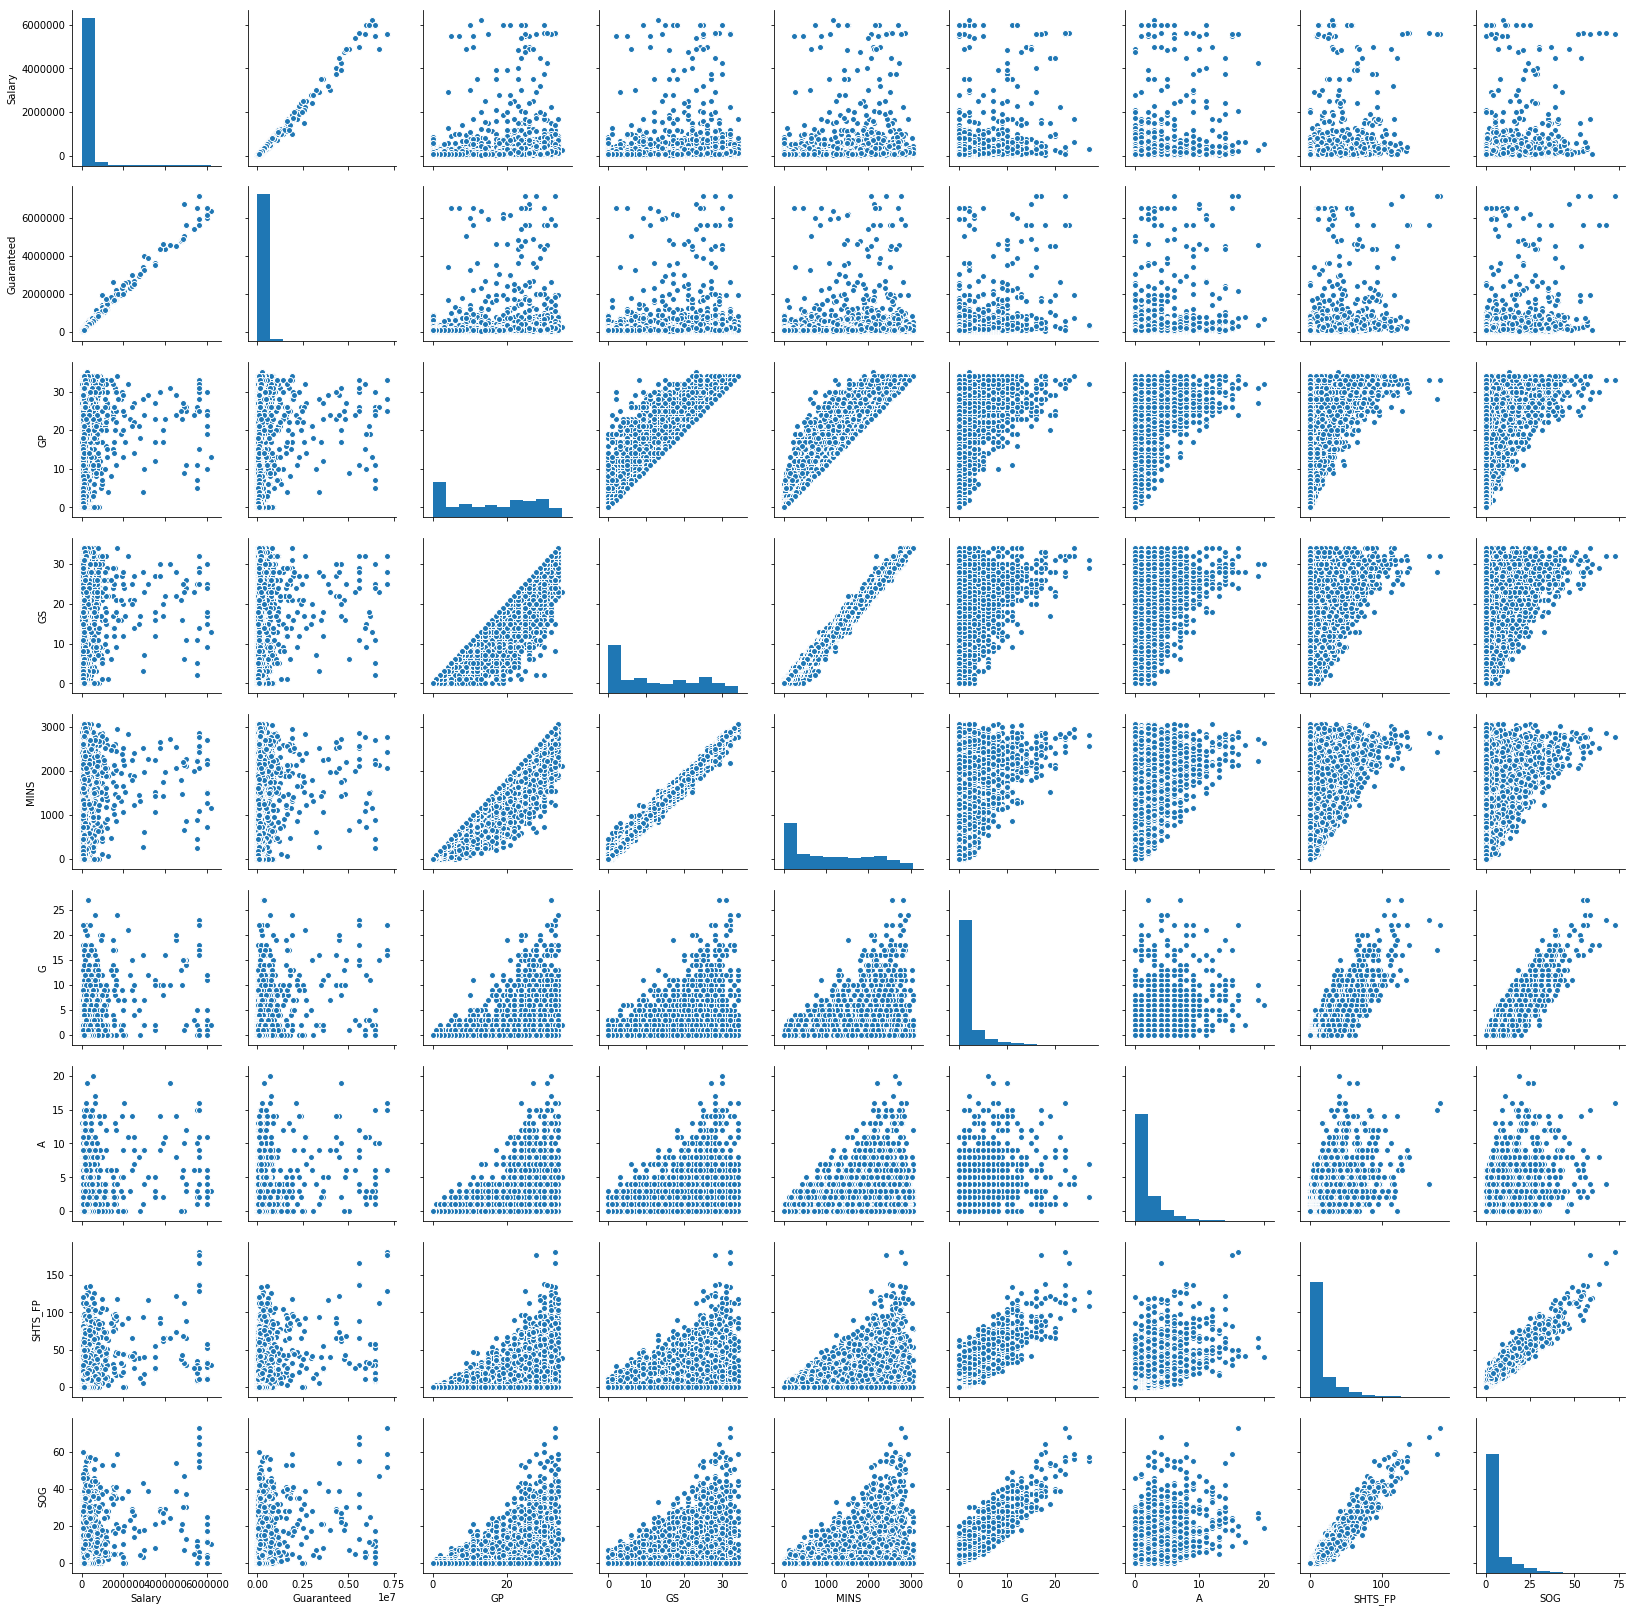

In [82]:
# Plot all of the variable-to-variable relations as scatterplots
cols = [sidx, gidx] + list(np.arange(0, 10))
sns.pairplot(df.iloc[:, cols])

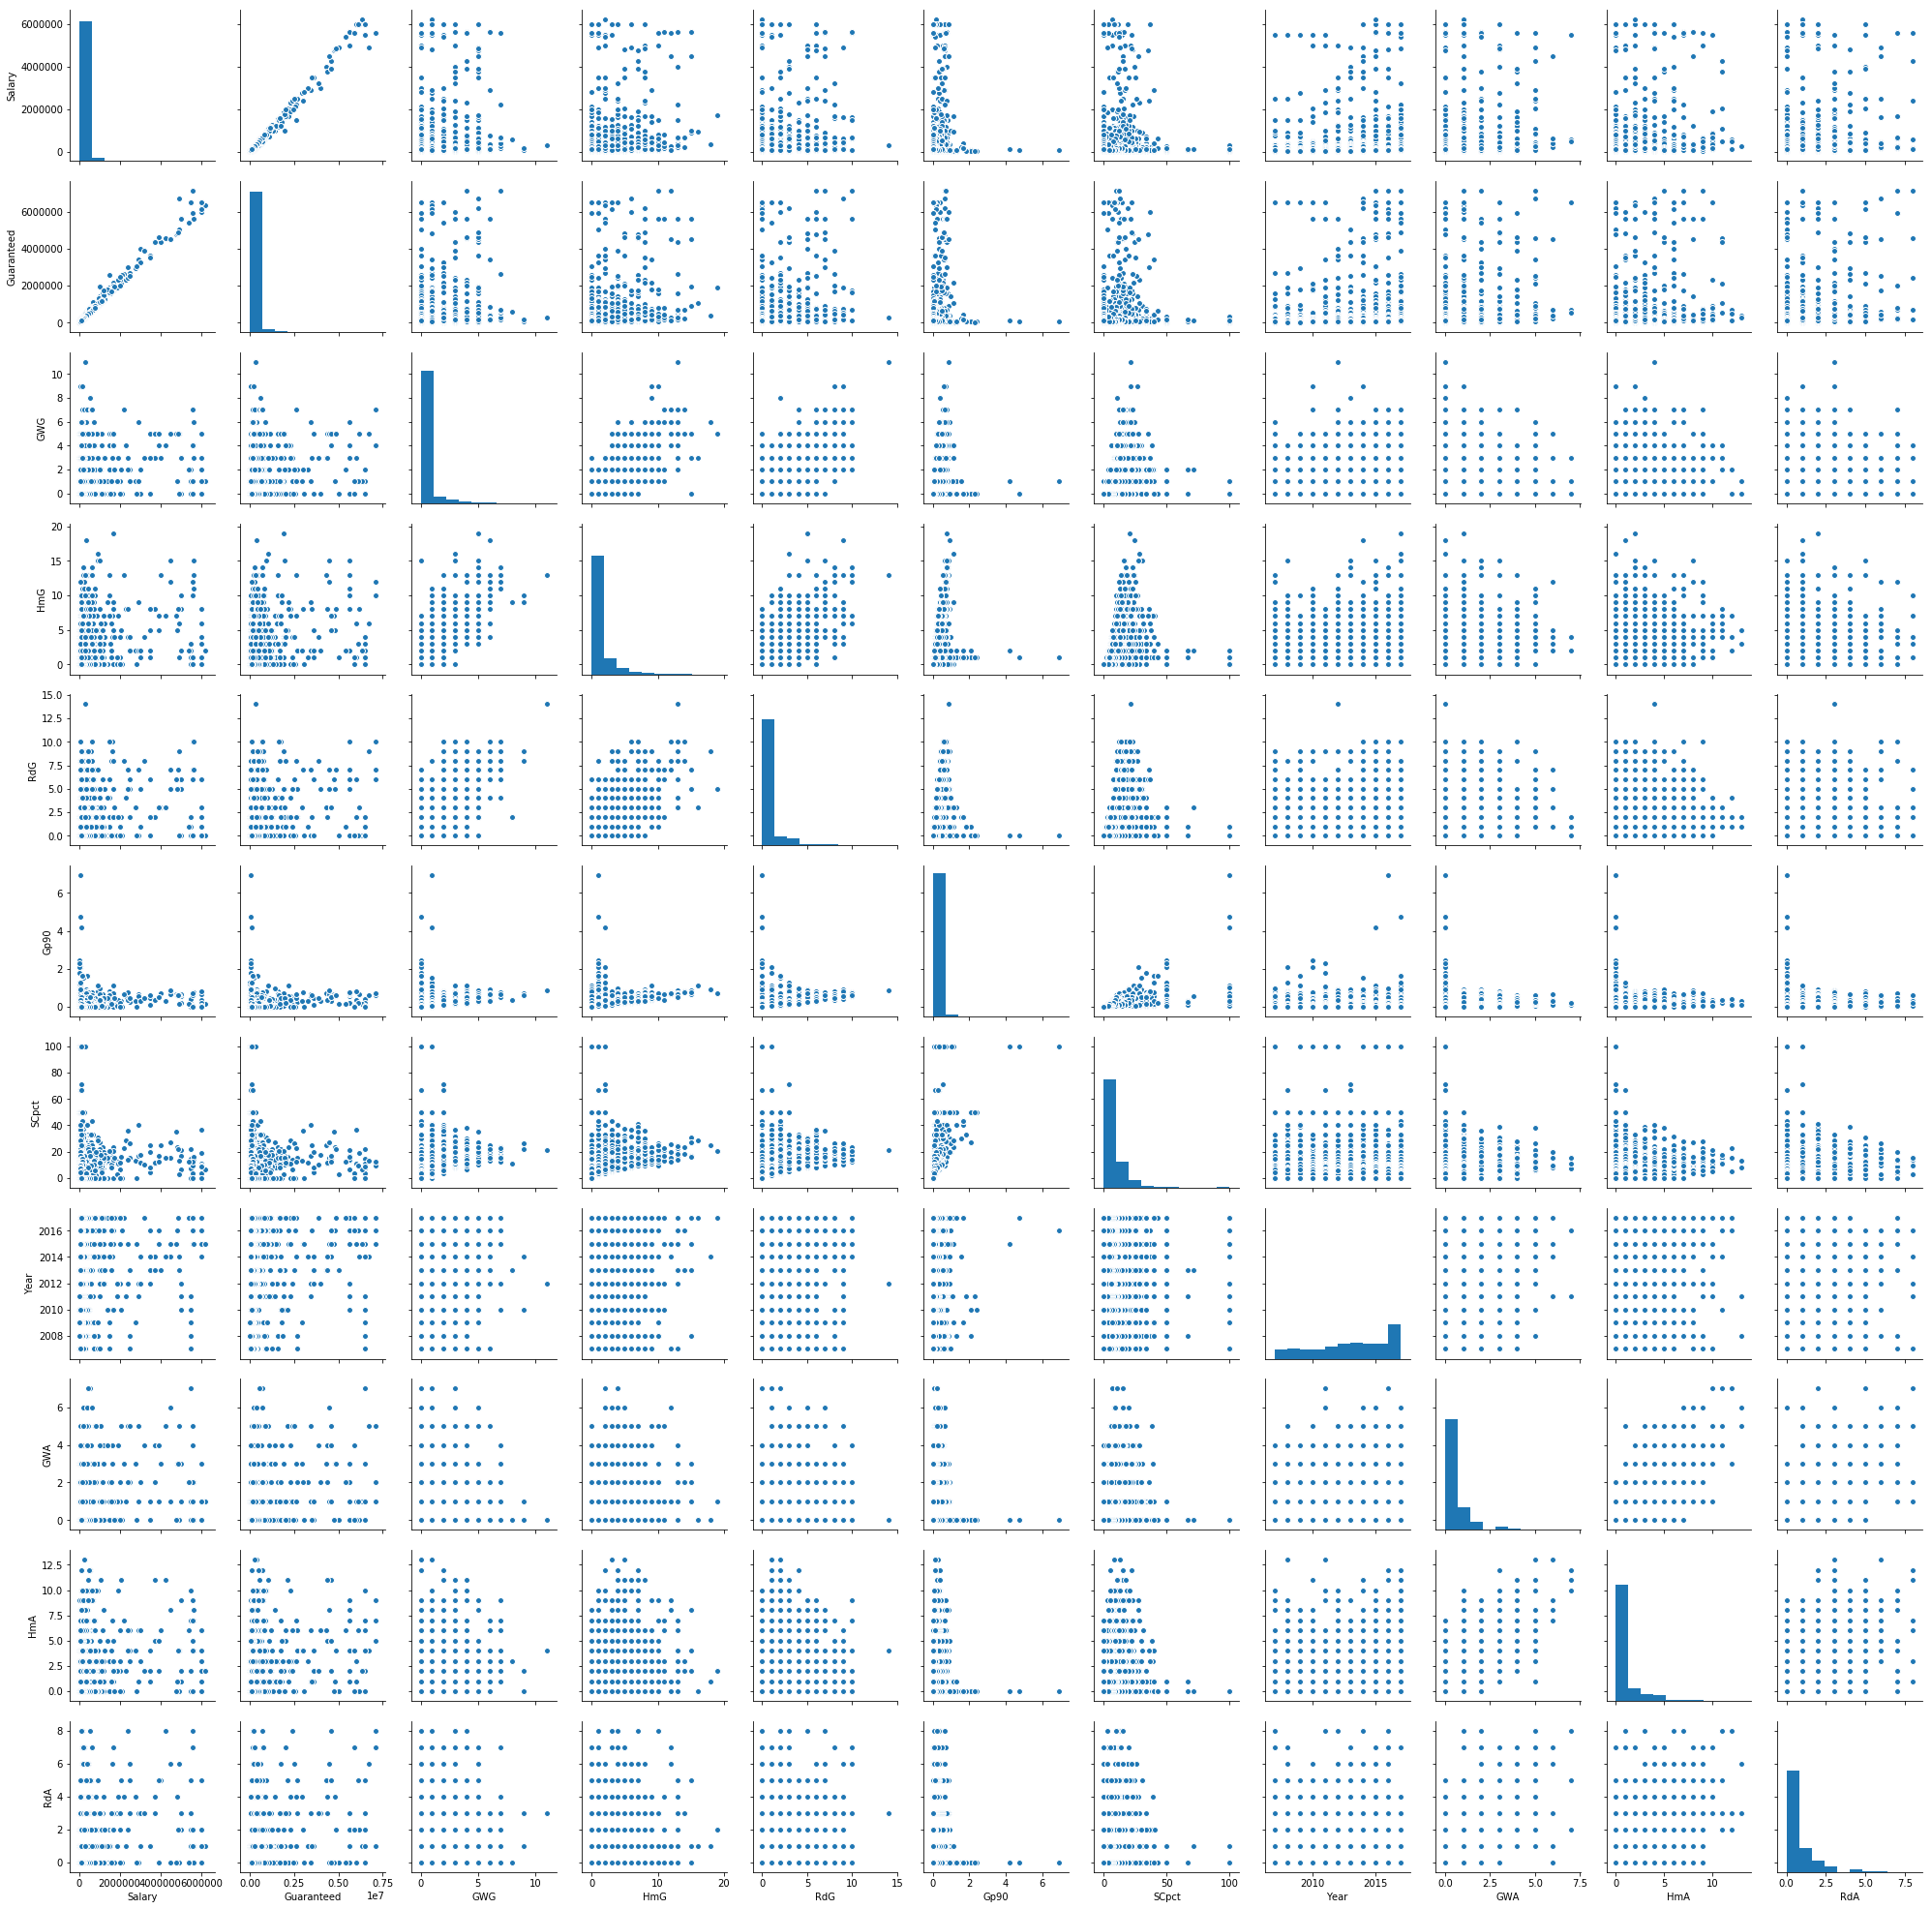

In [86]:
cols = [sidx, gidx] + list(np.arange(10, 20))
sns.pairplot(df.iloc[:, cols])

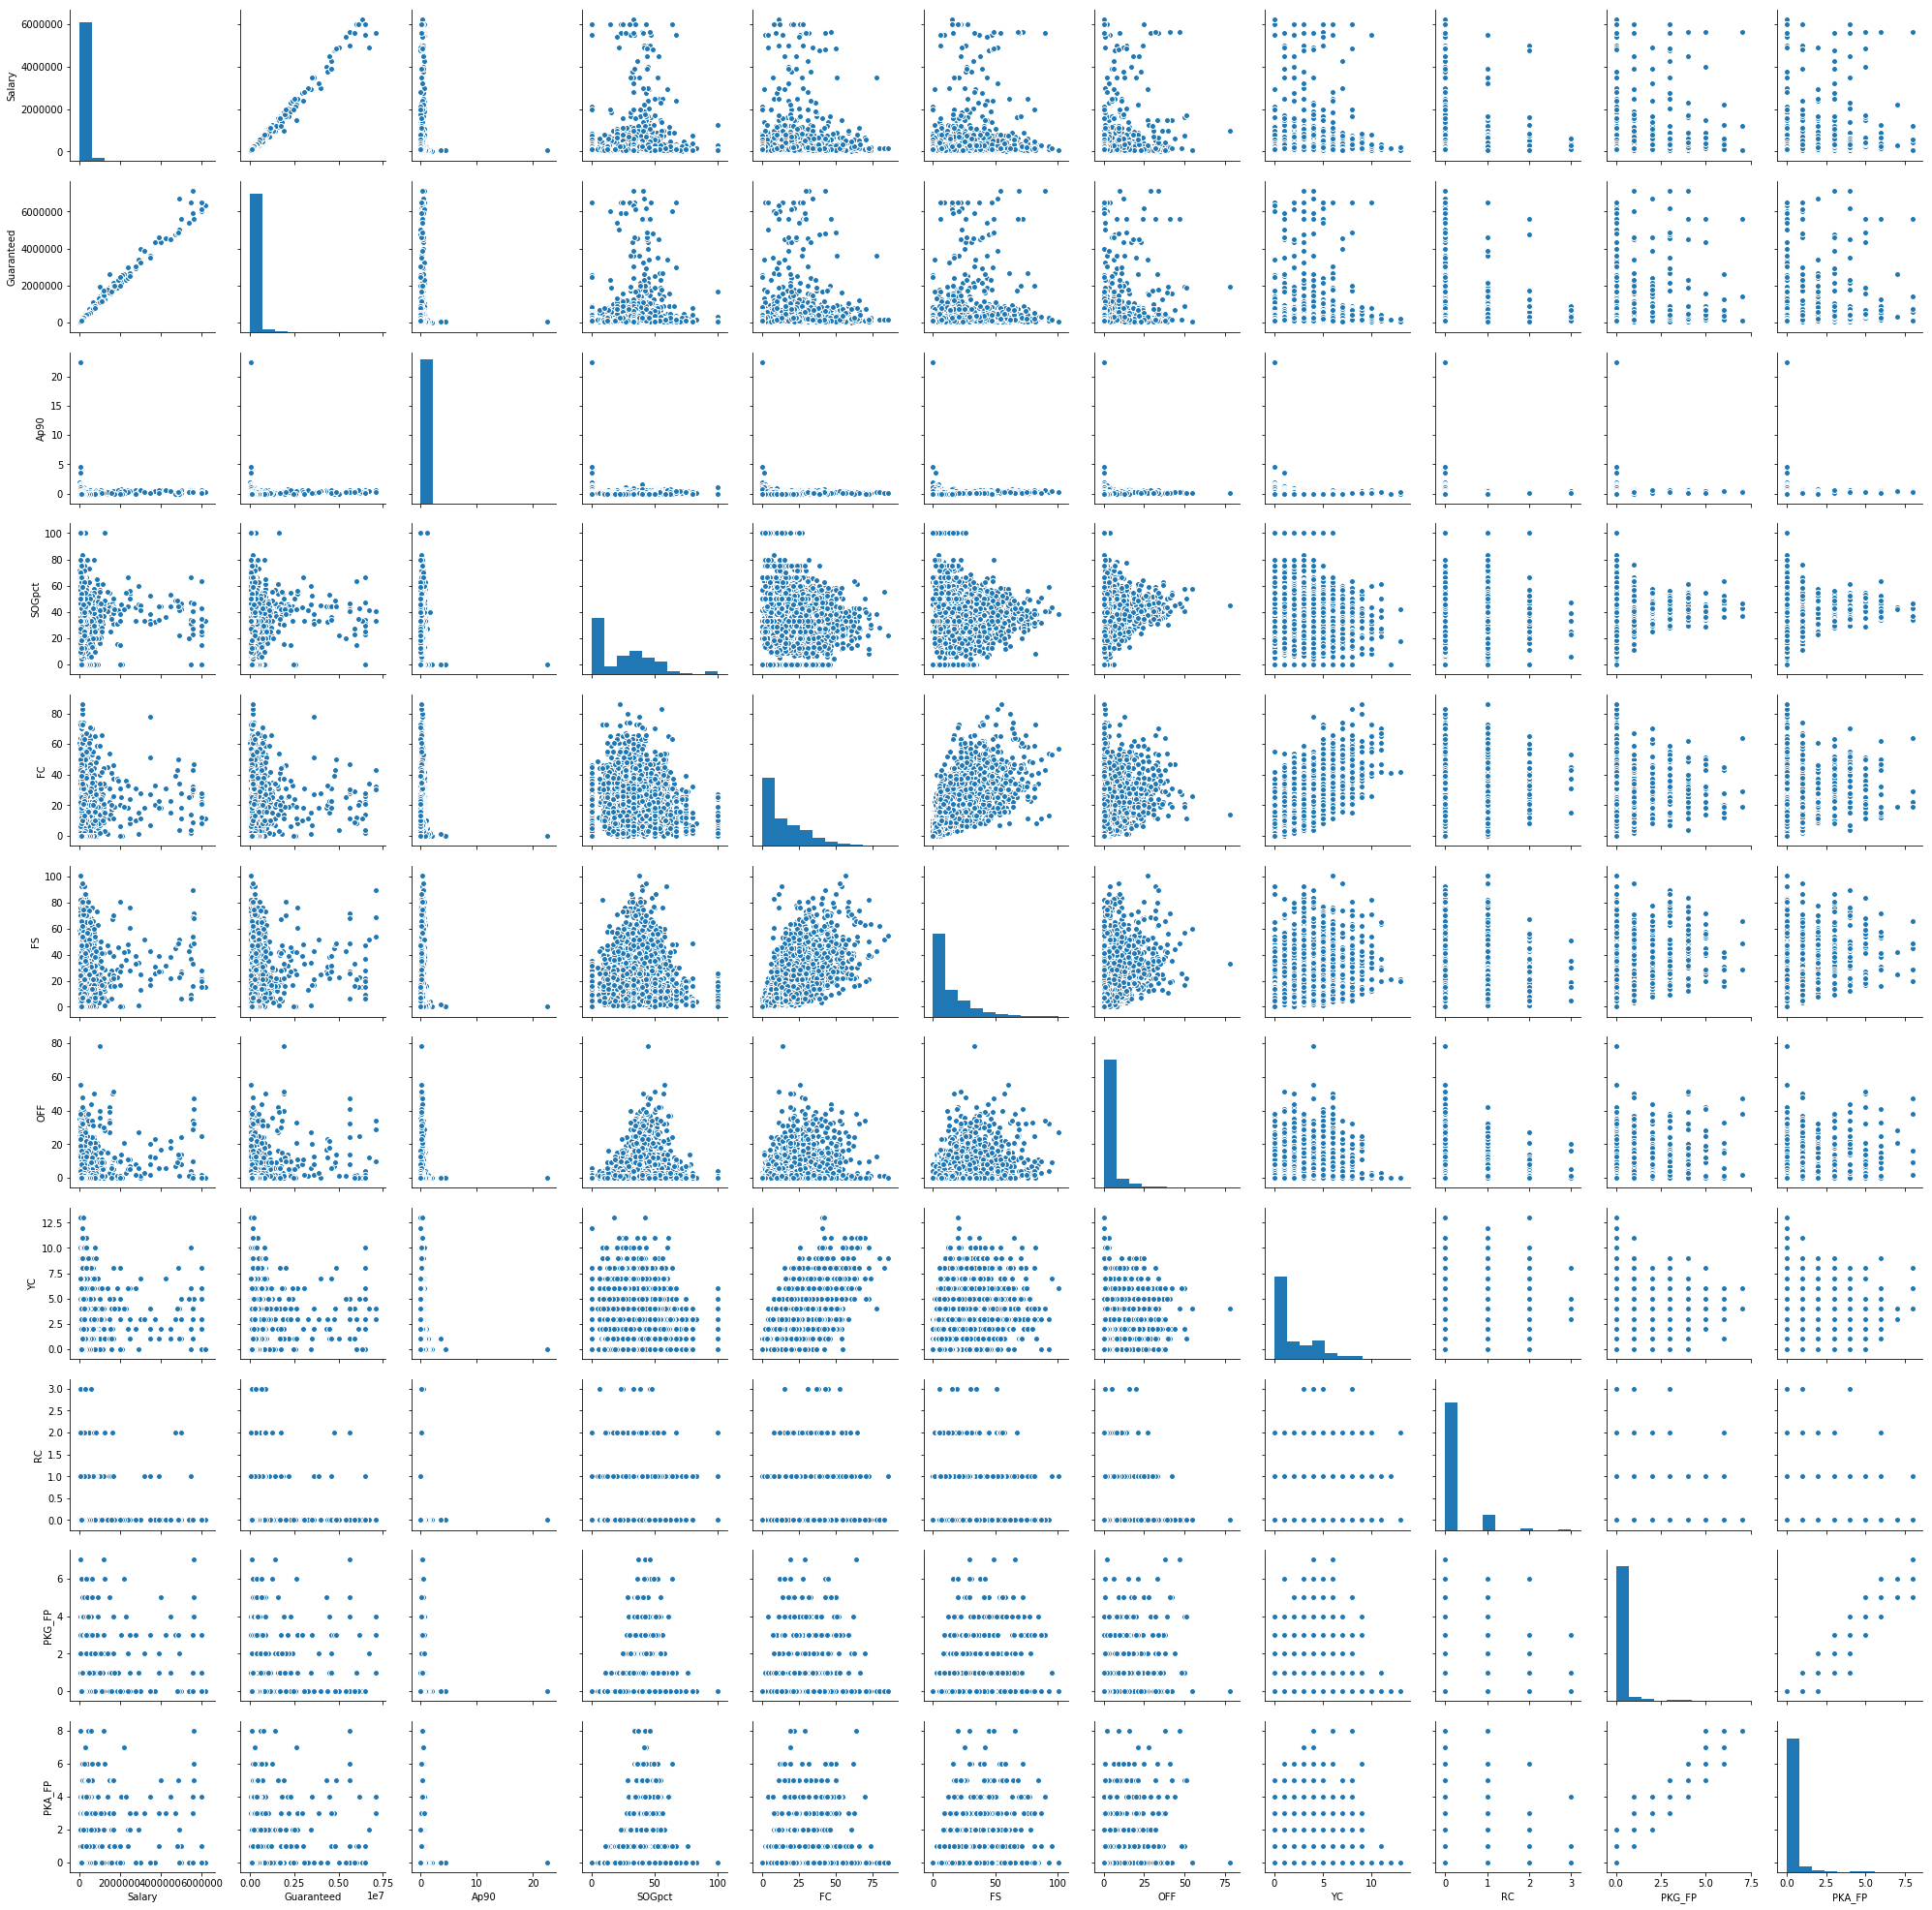

In [87]:
cols = [sidx, gidx] + list(np.arange(20, 30))
sns.pairplot(df.iloc[:, cols])

In [88]:
cols = [sidx, gidx] + list(np.arange(33:40))
sns.pairplot(df.iloc[:, cols])

SyntaxError: invalid syntax (<ipython-input-88-a0a860beaab9>, line 1)

In [ ]:
cols = [sidx, gidx] + list(np.arange(40, len(df)+1))
sns.pairplot(df.iloc[:, cols])

## Modeling